In [1]:
import pickle
import numpy as np
import lzma
import scipy.signal
import tensortools as tt
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import scipy.signal
import matplotlib.cm as cm

In [2]:
paramlist = []
counter = 0
for networktype in ['FeedForward', 'ScaleFree', 'SmallWorld']:
    for cellcount in [60]: #30, 40, 50, 
        for modelid in range(10):
                for inputid in range(10):
                    for MeanDelay_noround in np.arange(3, 3.01, 0.2):
                        MeanDelay = np.round(MeanDelay_noround,1)
                        for stdDelay_noround in np.arange(0, 1.01, 0.05):
                            stdDelay = np.round(stdDelay_noround,2)
                            param = {'NetworkType': networktype, 'n': cellcount, 'model_id': modelid, 'input_idx': inputid, 'MeanDelay': MeanDelay, 'stdDelay': stdDelay, 'counter': counter}
                            paramlist.append(param)
                            counter += 1

In [3]:
len(paramlist)

6300

In [4]:
# paramlist[3*12600 + 1]

In [5]:
singleparam_dict = {'NetworkType': 'SmallWorld',
 'n': 60,
 'model_id': 3,
 'input_idx': 7,
 'MeanDelay': 3.0,
 'stdDelay': 0.95}

# SmallWorld_cellcount60_meandelay3.0_stddelay0.95_modelid3_inputid7_spectral.pkl

In [6]:
def reloadfile_spectral(paramdict):
    NetworkType, cellcount, model_id, input_idx, meandelay, stddelay = paramdict['NetworkType'], paramdict['n'], paramdict['model_id'], paramdict['input_idx'], paramdict['MeanDelay'], paramdict['stdDelay']
    # filename = f'./SpectralProcessing/{NetworkType}_cellcount{cellcount}_meandelay{meandelay}_stddelay{stddelay}_modelid{model_id}_inputid{input_idx}_spectral.pkl'
    filename = f'/vast/palmer/scratch/mcdougal/rh882/NetworkError60/SpectralProcessing/{NetworkType}_cellcount{cellcount}_meandelay{meandelay}_stddelay{stddelay}_modelid{model_id}_inputid{input_idx}_spectral.pkl'
    with open(filename, 'rb') as f: 
        output = pickle.load(f)
    return output

# spectral_data = reloadfile_spectral(paramlist[3*12600 + 1])
spectral_data = reloadfile_spectral(singleparam_dict)

In [7]:
len(spectral_data[0])

60

In [28]:
paramlist = []
counter = 0
for networktype in ['ScaleFree']:#'FeedForward', 'ScaleFree', 'SmallWorld'
    for cellcount in [60]:
        for modelid in [5]: #range(10)
                for inputid in [5]:#range(10)
                    for MeanDelay_noround in np.arange(3, 3.01, 0.2):
                        MeanDelay = np.round(MeanDelay_noround,1)
                        for stdDelay_noround in np.arange(0, 1.01, 0.05):
                            stdDelay = np.round(stdDelay_noround,2)
                            param = {'NetworkType': networktype, 'n': cellcount, 'model_id': modelid, 'input_idx': inputid, 'MeanDelay': MeanDelay, 'stdDelay': stdDelay, 'counter': counter}
                            paramlist.append(param)
                            counter += 1

In [29]:
len(paramlist)

21

In [30]:
# errorlst = []
# try:
#     for i in range(len(paramlist)):
#         spectral_data = reloadfile_spectral(paramlist[i])
#         if i % 100 == 0:
#             print(i)
# except Exception as e:
#     print("An error occurred: " + str(e))
#     errorlst.append(e)

In [31]:
paramlist[20]

{'NetworkType': 'ScaleFree',
 'n': 60,
 'model_id': 5,
 'input_idx': 5,
 'MeanDelay': 3.0,
 'stdDelay': 1.0,
 'counter': 20}

In [32]:
# paramlist[24]

In [33]:
# reloadfile_spectral(paramlist[9])

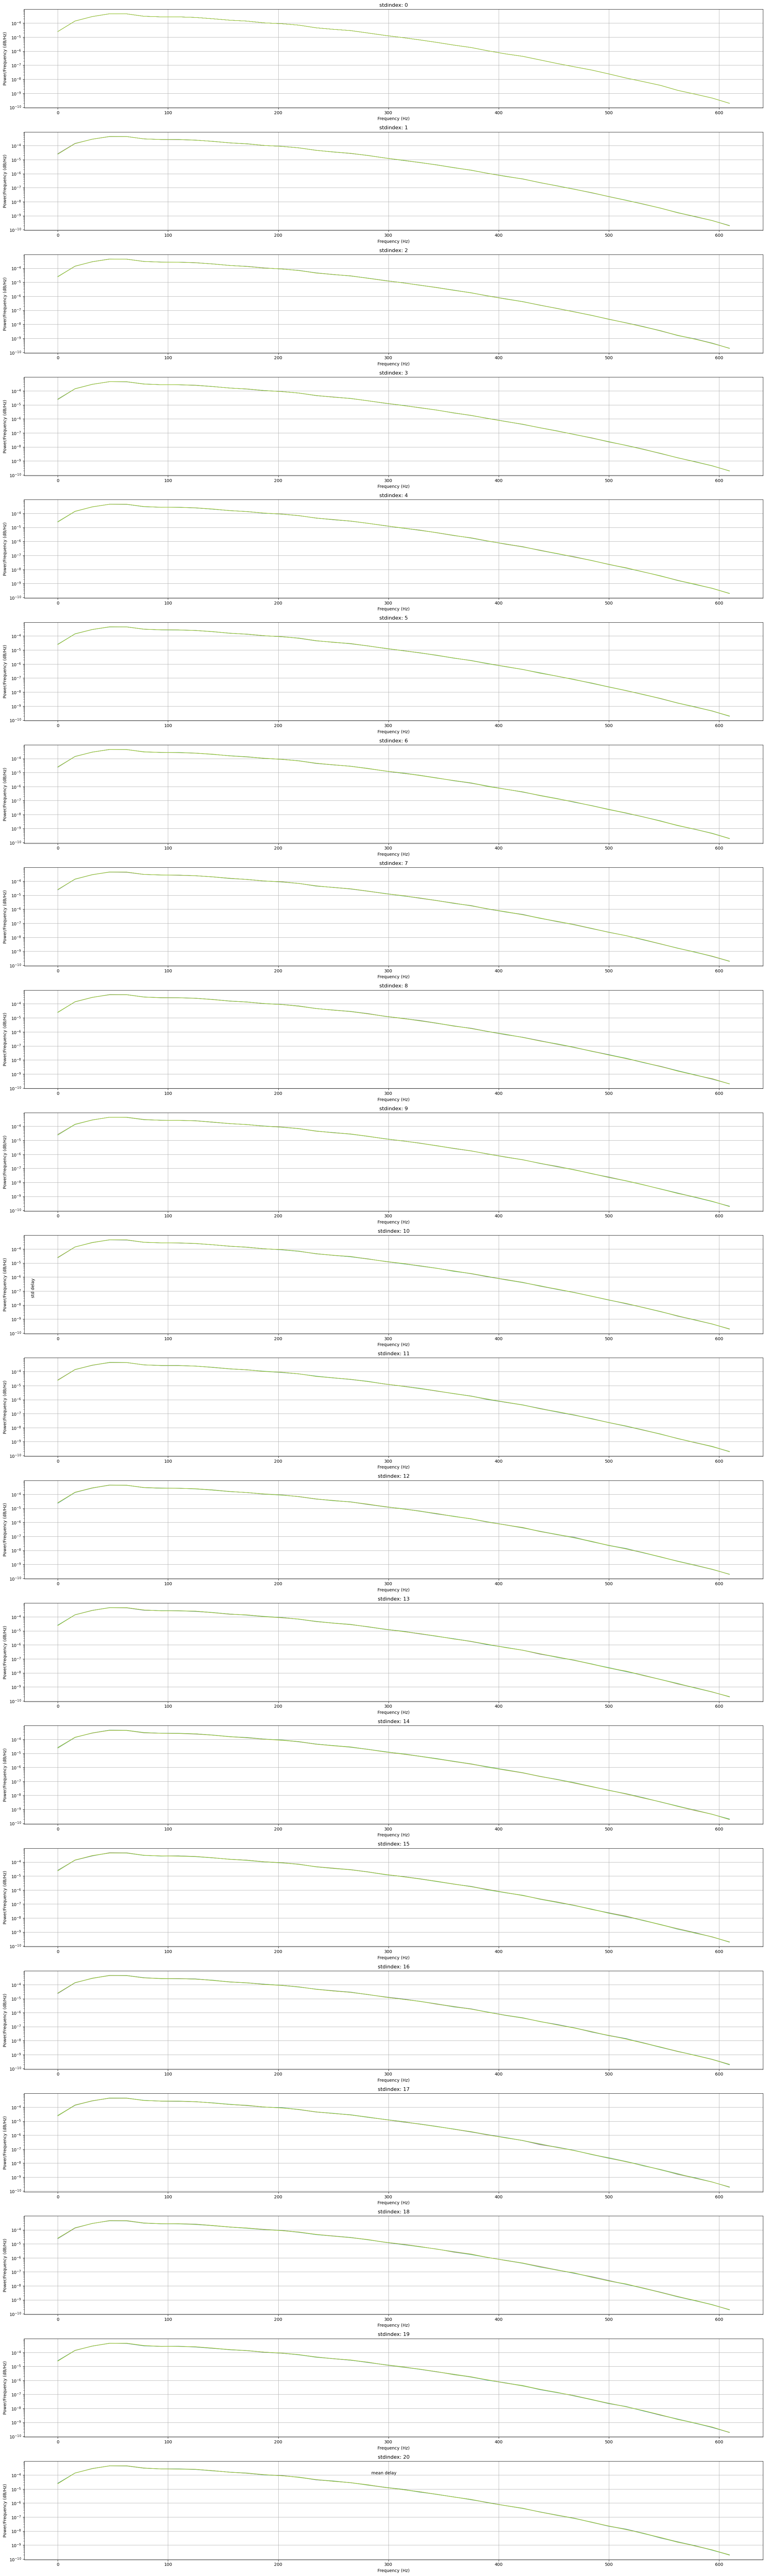

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming reloadfile_spectral and paramlist are defined as before

cellcode = 45
cutoff = 40
nruns = 10  # Assuming there are 10 runs in each spectral_data
colors = cm.viridis(np.linspace(0, 1, nruns))

# Create a 21x5 grid of subplots
fig, axes = plt.subplots(21, 1, figsize=(25, 84))  # Adjust the figsize as needed
fig.subplots_adjust(hspace=0.5)

# # Iterate over each subplot and paraid
# for index in range(21):  # Assuming we have 126 paraids, from 0 to 125  len(paramlist)[:126]
#     paraid = index
#     spectral_data = reloadfile_spectral(paramlist[paraid])

#     # Calculate the position of the subplot
#     col = index // 21  # Integer division to find the row
#     row = index % 21   # Modulus to find the column
#     ax = axes[row, col]  # Get the specific Axes object to plot on
#     # ax = axes[row] 

#     # Plot on the chosen subplot
#     for nrun in range(nruns):
#         ax.semilogy(
#             spectral_data[nrun][cellcode]['freq'][:cutoff],
#             spectral_data[nrun][cellcode]['psd'][:cutoff],
#             linewidth=1, alpha=0.5, color=colors[nrun]
#         )

#     # Set labels and titles if necessary
#     ax.set_xlabel('Frequency (Hz)')
#     ax.set_ylabel('Power/Frequency (dB/Hz)')
#     ax.set_title(f'paraid: {paraid}')
#     ax.grid(True)

# axes.set_xlabel('mean delay')
# axes.set_ylabel('std delay')

# # Adjust the layout so labels and titles don't overlap
# plt.tight_layout()
# plt.show()


if axes.ndim == 1:
    axes = np.expand_dims(axes, axis=1)

# Iterate over each subplot and paraid
for index in range(21):  # Assuming we have 126 paraids, from 0 to 125  len(paramlist)[:126]
    paraid = index
    spectral_data = reloadfile_spectral(paramlist[paraid])

    # Calculate the position of the subplot
    col = index // 21  # Integer division to find the row
    row = index % 21   # Modulus to find the column
    ax = axes[row, col]  # Get the specific Axes object to plot on

    # Plot on the chosen subplot
    for nrun in range(nruns):
        # print(spectral_data[nrun][cellcode]['psd'][:cutoff])
        ax.semilogy(
            spectral_data[nrun][cellcode]['freq'][:cutoff],
            spectral_data[nrun][cellcode]['psd'][:cutoff],
            linewidth=1, alpha=0.5, color=colors[nrun]
        )

    # Set labels and titles if necessary
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power/Frequency (dB/Hz)')
    ax.set_title(f'stdindex: {paraid}')
    ax.grid(True)

# Assuming you intended to label the entire figure, not a single axis
fig.text(0.5, 0.04, 'mean delay', ha='center')
fig.text(0.04, 0.5, 'std delay', va='center', rotation='vertical')

# Adjust the layout so labels and titles don't overlap
plt.tight_layout()
plt.show()

In [35]:
spectral_data[1]

[{'freq': array([   0.   ,   15.625,   31.25 ,   46.875,   62.5  ,   78.125,
           93.75 ,  109.375,  125.   ,  140.625,  156.25 ,  171.875,
          187.5  ,  203.125,  218.75 ,  234.375,  250.   ,  265.625,
          281.25 ,  296.875,  312.5  ,  328.125,  343.75 ,  359.375,
          375.   ,  390.625,  406.25 ,  421.875,  437.5  ,  453.125,
          468.75 ,  484.375,  500.   ,  515.625,  531.25 ,  546.875,
          562.5  ,  578.125,  593.75 ,  609.375,  625.   ,  640.625,
          656.25 ,  671.875,  687.5  ,  703.125,  718.75 ,  734.375,
          750.   ,  765.625,  781.25 ,  796.875,  812.5  ,  828.125,
          843.75 ,  859.375,  875.   ,  890.625,  906.25 ,  921.875,
          937.5  ,  953.125,  968.75 ,  984.375, 1000.   , 1015.625,
         1031.25 , 1046.875, 1062.5  , 1078.125, 1093.75 , 1109.375,
         1125.   , 1140.625, 1156.25 , 1171.875, 1187.5  , 1203.125,
         1218.75 , 1234.375, 1250.   , 1265.625, 1281.25 , 1296.875,
         1312.5  , 1328.12